# Augmentation - 5 Crop

In [84]:
import numpy as np
import pandas as pd
import shutil
import csv
import cv2
import time
from glob import glob
from tqdm import tqdm
from matplotlib import pyplot as plt

seed = 0


In [79]:
annotaion_path = '../../data/data/annotation.csv'
df = pd.read_csv(annotaion_path)

df = df[:1]

df

,image_name,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16
0,5a001349e4b0dca30d30524e.jpg,909,1175,2364,1175,1007,328,1199,1865,2264,...,2072,678,1399,768,559,573,1909,713,2689,550


In [80]:
idx = 0

landmarks = df.loc[idx, 'x1':].tolist()

5a001349e4b0dca30d30524e.jpg
../../data/data/images/5a001349e4b0dca30d30524e.jpg
(3015, 3015)


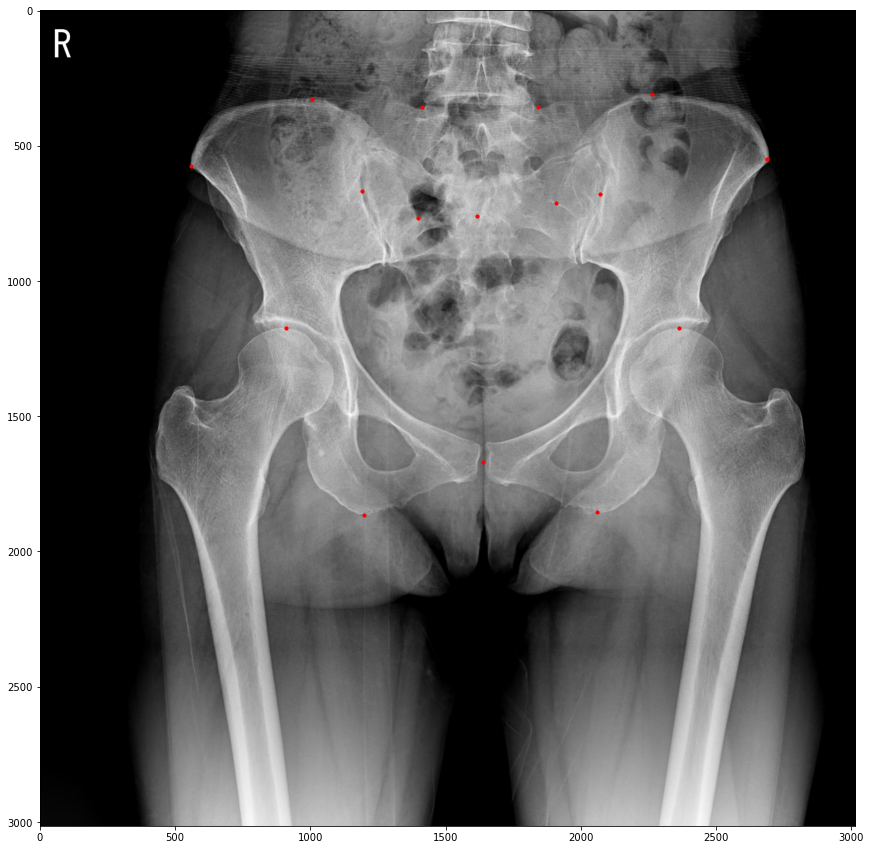

In [103]:
img_title = df.image_name[0]
print(img_title)

img_path = '../../data/data/images/' + img_title
print(img_path)
img = cv2.imread(img_path, 0)
print(img.shape)

plt.figure(figsize=(15, 15))
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/org.jpg')
plt.show()


In [82]:
landmarks_x = landmarks[0::2]
landmarks_y = landmarks[1::2]
# print(len(landmarks_x), len(landmarks_y))

print("--- x ---")
x_min, x_max = min(landmarks_x), max(landmarks_x)
print(x_min, x_max)

print("--- y ---")
y_min, y_max = min(landmarks_y), max(landmarks_y)
print(y_min, y_max)

--- x ---
559 2689
--- y ---
308 1865


5a001349e4b0dca30d30524e.jpg
../../data/data/images/5a001349e4b0dca30d30524e.jpg
(3015, 3015)


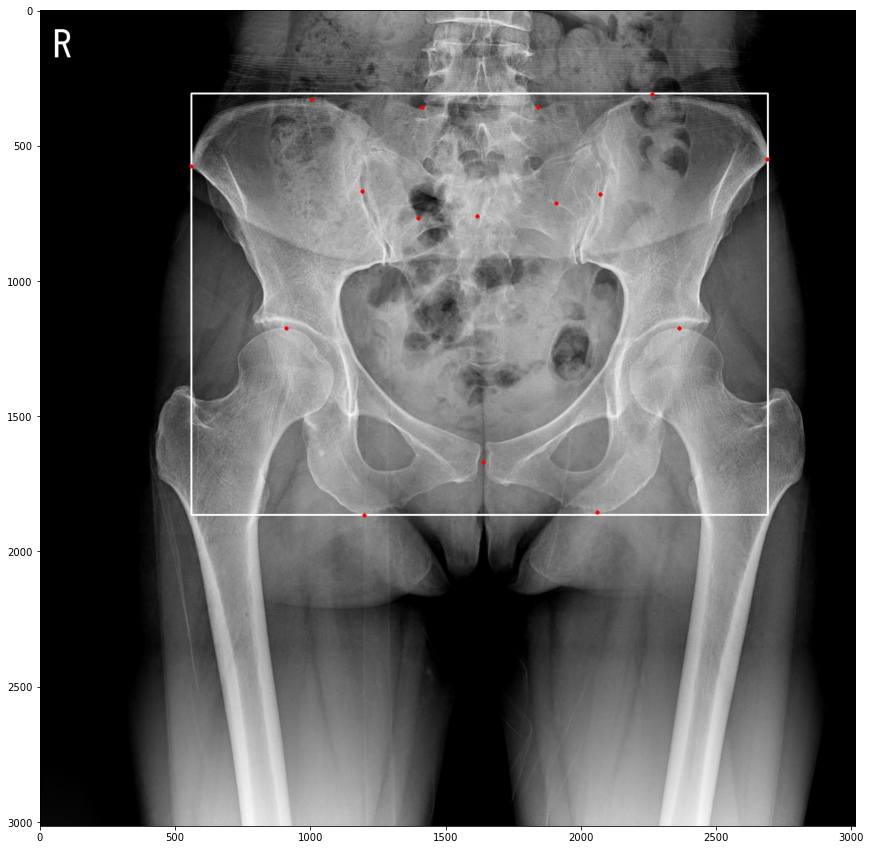

In [110]:
img_title = df.image_name[0]
print(img_title)

img_path = '../../data/data/images/' + img_title
print(img_path)
img = cv2.imread(img_path, 0)
print(img.shape)

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_0.jpg')
plt.show()

## Crop 1

(3015, 3015)
kx:  163 ky:  575


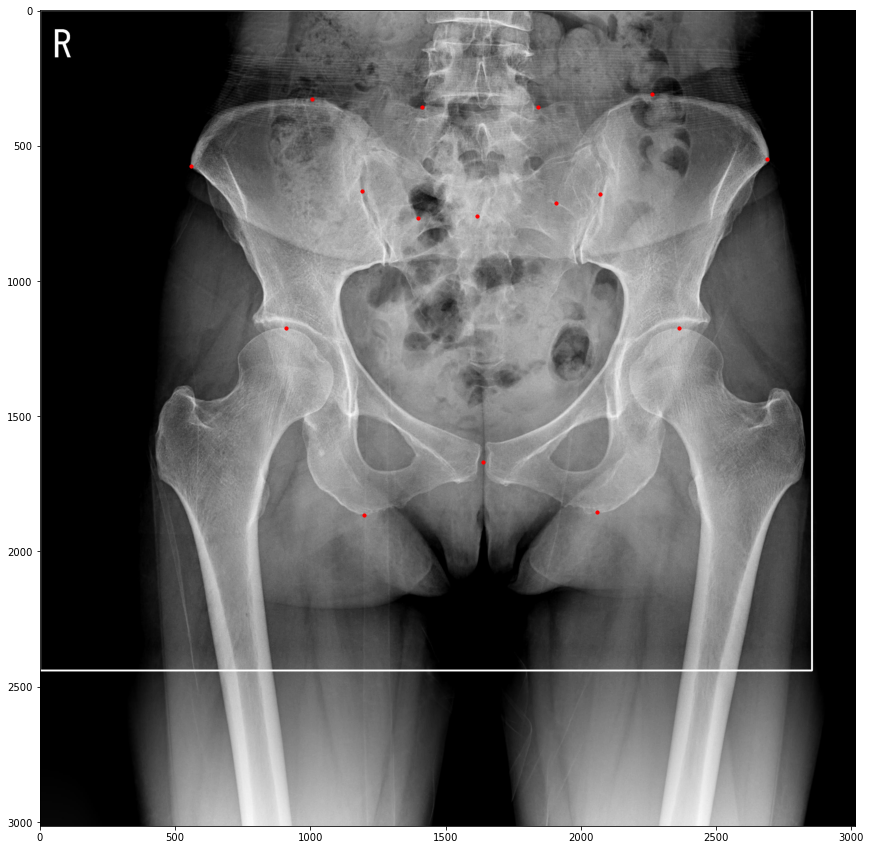

In [105]:
img = cv2.imread(img_path, 0)
print(img.shape)

img_y, img_x = img.shape

kx = (img_x - x_max) // 2
ky = (img_y - y_max) // 2
print("kx: ", kx, "ky: ", ky)

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (0, 0), (x_max + kx, y_max + ky), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_1.jpg')
plt.show()

## Crop 2

(3015, 3015)
kx:  279 ky:  575


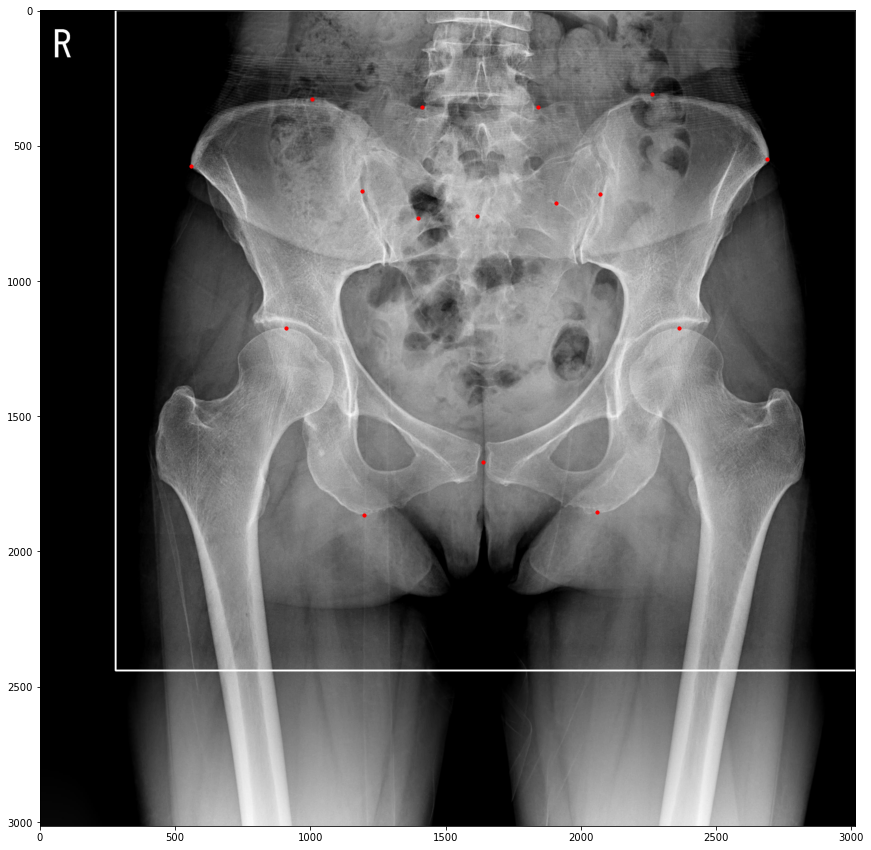

In [111]:
img = cv2.imread(img_path, 0)
print(img.shape)

img_y, img_x = img.shape

kx = (x_min - 0) // 2
ky = (img_y - y_max) // 2
print("kx: ", kx, "ky: ", ky)

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (kx, 0), (img_x, y_max + ky), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_2.jpg')
plt.show()

## Crop 3

(3015, 3015)
kx:  163 ky:  154


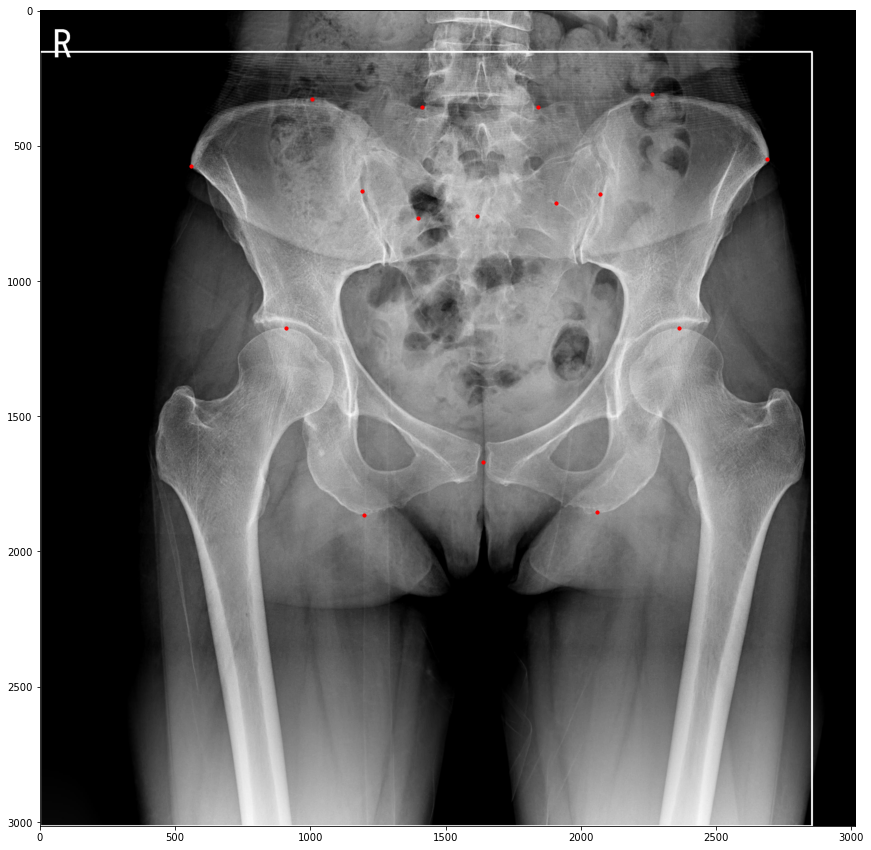

In [112]:
img = cv2.imread(img_path, 0)
print(img.shape)

img_y, img_x = img.shape

kx = (img_x - x_max) // 2
ky = (y_min - 0) // 2
print("kx: ", kx, "ky: ", ky)

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (0, ky), (x_max + kx, img_y), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_3.jpg')
plt.show()

## Crop 4

(3015, 3015)
kx:  279 ky:  154


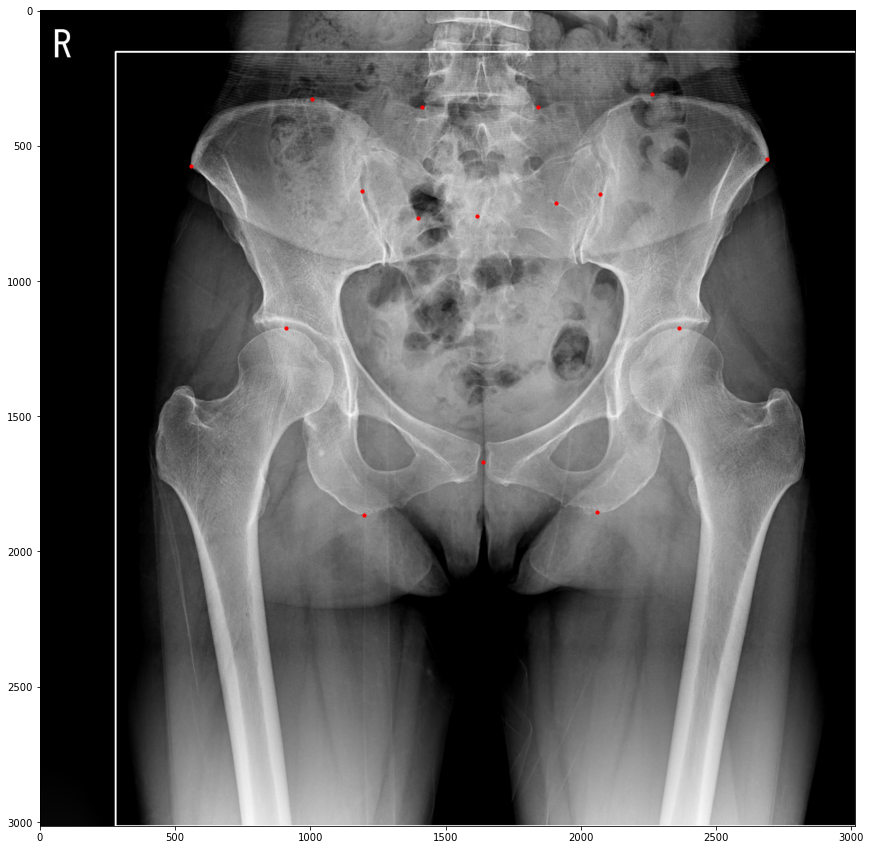

In [113]:
img = cv2.imread(img_path, 0)
print(img.shape)

img_y, img_x = img.shape

kx = (x_min - 0) // 2
ky = (y_min - 0) // 2
print("kx: ", kx, "ky: ", ky)

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (kx, ky), (img_x, img_y), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_4.jpg')
plt.show()

## Crop 5

(3015, 3015)


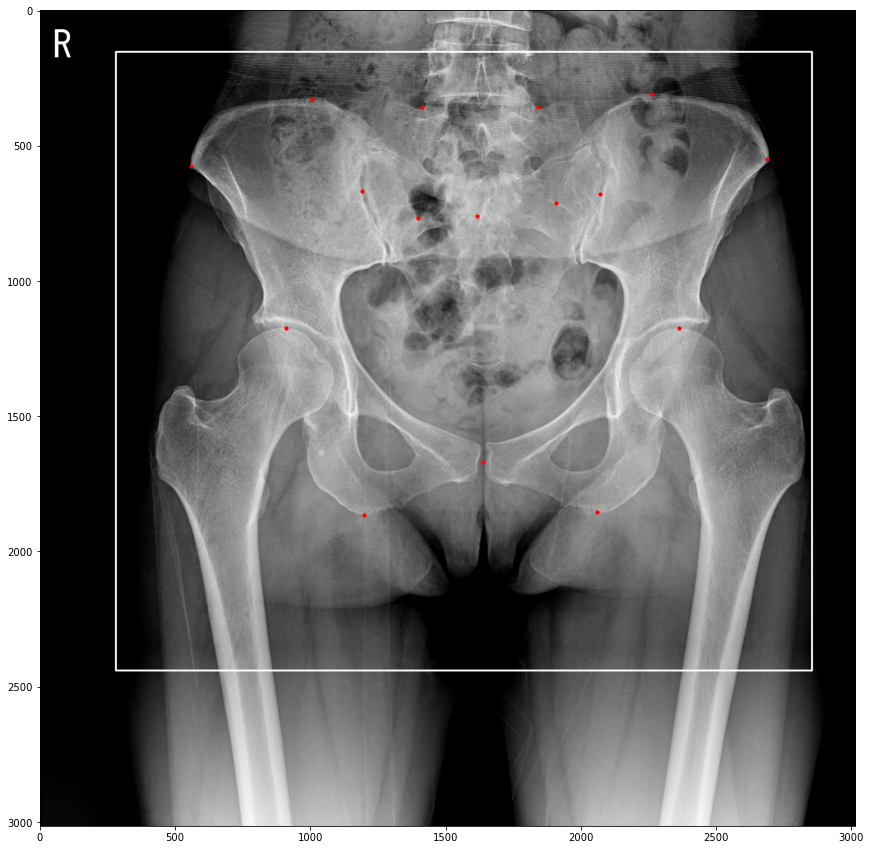

In [114]:
img = cv2.imread(img_path, 0)
print(img.shape)

img_y, img_x = img.shape

kx1 = (x_min - 0) // 2
kx2 = (img_x - x_max) // 2

ky1 = (y_min - 0) // 2
ky2 = (img_y - y_max) // 2

plt.figure(figsize=(15, 15))
cv2.rectangle(img, (x_min-kx1, y_min-ky1), (x_max+kx2, y_max+ky2), (255, 0, 0), 5)
plt.imshow(img, cmap='gray')
for j in range(0, len(landmarks), 2):
    plt.scatter(landmarks[j], landmarks[j+1], c='r', s=10)
plt.savefig('./5crop/5crop_5.jpg')
plt.show()